# <center>Coursera Course Dataset EDA<center>

## <center>Introduction<center>

Welcome to Coursera course dataset analysis. This notebook is focused on showing knowgladge related to data analysis, linear algebra, NumPy, Pandas and Matplotlib/Seaborn  while conducting analysis.

## <center>Used Libraries<center>

In this analysis, we employ three types of libraries. **Numpy** and **Pandas** serve for data manipulations, while **Matplotlib** and **Seaborn** are utilized for plotting. Additionally, **Scipy** aids in identifying outliers. The **Warnings** library is solely employed to suppress non-meaningful warning messages. Lastly, **googletrans** and **langdetect** are utilized for translating non-English text.

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from googletrans import Translator
from langdetect import detect

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## <center> Load dataset <center>

For this analysis we are using **Coursera Course Dataset** that can be found on [Kaggle](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset).

In [2]:
coursera_data= pd.read_csv('datasets/coursea_data.csv')
coursera_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
coursera_data.tail()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


## <center>Data cleaning<center>

### <center> Removing redundant columns <center>

Our current dataset contains a column ambiguously named **"Unnamed: 0,"** which is automatically generated and holds no substantive value. Therefore, we will proceed to drop this column.

In [4]:
coursera_data.drop('Unnamed: 0', axis=1, inplace=True)
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### <center>Null values<center>

During the data cleaning process, our first step involves checking for any null values within the dataset.

In [5]:
coursera_data.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

### <center> Duplication check <center>

First, we'll convert all the text in the dataset to lowercase and remove any leading or trailing spaces. We'll create a copy of the dataset to preserve the original formatting, as we'll perform formatting checks on the duplicated dataset.

In [6]:
coursera_data_lowercased = coursera_data.applymap(lambda x: x.lower().strip() if isinstance(x, str) else x)
coursera_data_lowercased.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(isc)² systems security certified practitioner...,(isc)²,specialization,4.7,beginner,5.3k
1,a crash course in causality: inferring causal...,university of pennsylvania,course,4.7,intermediate,17k
2,a crash course in data science,johns hopkins university,course,4.5,mixed,130k
3,a law student's toolkit,yale university,course,4.7,mixed,91k
4,a life of happiness and fulfillment,indian school of business,course,4.8,mixed,320k


Next up we check if all rows in our dataset are unique.

In [7]:
unique_rows = len(coursera_data_lowercased.drop_duplicates())
unique_rows

891

We have **891** unique rows in the dataset. However, there may be errors in the input values. To address this, let's check how many unique values each feature has.

In [8]:
unique_row_by_feature = coursera_data_lowercased.nunique()
unique_row_by_feature

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

As observed, there are only **888** unique course names, indicating that some course names are duplicated. Let's investigate whether these duplicated course names have differences in other features.

In [9]:
duplicated_courses = coursera_data_lowercased[coursera_data_lowercased.duplicated('course_title', keep=False)]
duplicated_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,developing your musicianship,berklee college of music,course,4.8,mixed,41k
225,developing your musicianship,berklee college of music,specialization,4.8,beginner,54k
563,machine learning,university of washington,specialization,4.6,intermediate,290k
564,machine learning,stanford university,course,4.9,mixed,3.2m
582,marketing digital,universidade de são paulo,course,4.8,beginner,81k
583,marketing digital,universidad austral,specialization,4.7,beginner,39k


Now we can be reasonably certain that the data does not contain any duplicates.

### <center> Data type check <center>

In [10]:
coursera_data.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

As we can see, the **course_students_enrolled** feature, which represents the number of enrolled students, is represented as an object and not as a numerical value. We need to convert it into a float or an integer.

In [11]:
def convert_student_enrollment_value(value):
    if value[-1] == 'k':
        return int(float(value[:-1]) * 1000)
    elif value[-1] == 'm':
        return int(float(value[:-1]) * 1000000)
    else:
        return int(value)

coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].apply(convert_student_enrollment_value)
coursera_data.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### <center> Outlier check <center>

While searching for outliers, we utilize the dataset's **description** and the **zscore** function from the scipy library. Descriptions provide a comprehensive overview of the dataset, and the zscore function helps identify data points with extreme deviations.

In [12]:
coursera_data.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [13]:
z_scores = zscore(coursera_data[['course_rating', 'course_students_enrolled']])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
outlier_data = coursera_data.loc[outliers, coursera_data.columns.difference(['course_title', 'course_organization',
                                                                            'course_Certificate_type', 'course_difficulty'])]

print(outlier_data)

Empty DataFrame
Columns: [course_rating, course_students_enrolled]
Index: []


Although our dataset exhibits a wide range of values in the enrolled student count, there don't appear to be any significant outliers at first glance. However, we will conduct a more thorough examination of this later on.

### <center>Text formating<center>

When we loaded our dataset, we observed that some values were in non-English languages. To ensure ease of searching within the dataset in the future, we'll convert those values to their English representations.

In [14]:
def translate_to_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            translator = Translator()
            translation = translator.translate(text, dest='en').text
            return translation
    except Exception as e:
        return text

coursera_data_translated = coursera_data.copy()
coursera_data_translated['course_title'] = coursera_data_translated['course_title'].apply(translate_to_english)
coursera_data_translated['course_organization'] = coursera_data_translated['course_organization'].apply(translate_to_english)
coursera_data_translated.tail()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,Programming on Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000
887,Psycholinguistics.,Saint Petersburg State University,COURSE,4.8,Mixed,21000
888,Interfaces Development: Loader and JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000
889,Russian as a foreign,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800
890,Financial instruments for a private investor,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38000


**WARNING**: This method of translation is relatively inefficient. It takes approximately 4 minutes for our small dataset. For larger datasets (millions of rows), this approach would not be practical. Additionally, translations may not be perfect and may require more advanced techniques if higher accuracy is needed.

## <center>Exploratory data analysis<center>

To enhance the structure of our exploratory data analysis, we'll divide it into two parts: course-related analysis and provider-related analysis. For both parts, we have a list of questions that need to be addressed.<br> 

**Course related questions**<br> 

Main question: Is course rating a good metric to judge course quality?<br> 

1. What are the top 10 most enrolled courses?<br> 
2. What are top 10 highest rated courses?<br> 
3. Which 10 courses have the lowest rating?<br> 
4. What is the distribution of course ratings in the dataset?<br> 
5. What is the distribution of certificate type by student count?<br> 
6. What is course dificulty distribution by student count?<br> 
7. What is the distribution of difficulty levels for each certificate type?<br> 
8. Is there a correlation between course rating and enrolled student count?<br> 

**Course provider related questions**<br> 

Main question: Do course providers aim for course quantity or quality?<br> 

1. Which providers have most courses to offer?<br> 
2. which provider, that has more than 1 course uploaded, has best avarage rating?<br> 
3. which provider, that has more than 1 course uploaded, has worst avarage rating?<br> 
4. Is there correlation between providers course count and course rating?<br> 
5. What is the distribution of course count and their avarage ratings?<br> 
6. Which providers have most students?<br> 
7. Which provider has most avarage students per course?<br> 





### <center>Course related analysis<center> 

#### <center>What are the top 10 most enrolled courses?<center>

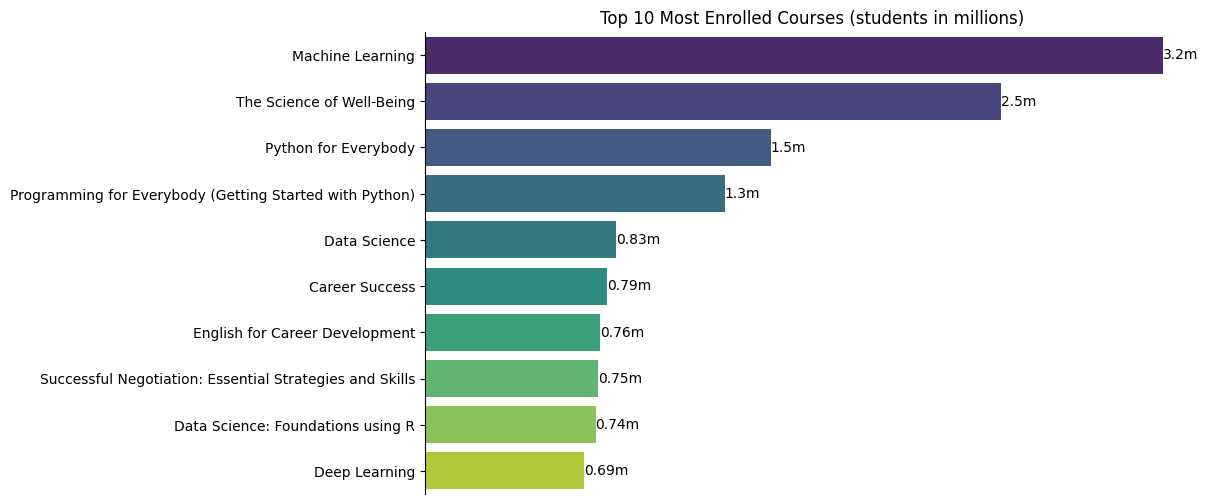

In [15]:
top_10_enrolled = coursera_data_translated.sort_values(by='course_students_enrolled', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='course_students_enrolled', y='course_title', data=top_10_enrolled, palette='viridis')

sns.despine()
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.title("Top 10 Most Enrolled Courses (students in millions)")
plt.ylabel("")
plt.xlabel("")

for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{float(p.get_width()/1000000)}m', ha='left', va='center')

plt.show()

Based on the graph, we observe that 6 out of the top 10 most popular courses are related to programming. Additionally, it's evident that the first four places are distinctly separated by a considerable margin, while the margins between courses decrease as we move further down the list.

#### <center> What are top 10 highest rated courses?<center>

In [16]:
sorted_by_raiting = coursera_data_translated.sort_values(by='course_rating', ascending=False)
sorted_by_raiting.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,The lawyer of the future: legaltech and the di...,Universidad Austral,COURSE,5.0,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600
754,Stories of Infection,Stanford University,COURSE,4.9,Intermediate,28000
290,Everyday Parenting: The ABCs of Child Rearing,Yale University,COURSE,4.9,Beginner,86000
98,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9500
99,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.9,Beginner,57000
614,More Introduction to Financial Accounting,University of Pennsylvania,COURSE,4.9,Mixed,40000
102,Bugs 101: Insect-Human Interactions,University of Alberta,COURSE,4.9,Beginner,15000
836,Understanding Einstein: The Special Theory of ...,Stanford University,COURSE,4.9,Beginner,89000
103,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,COURSE,4.9,Mixed,95000


#### <center>Which 10 courses have the lowest rating?<center>

In [17]:
sorted_by_raiting.tail(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
640,Optical Engineering,University of Colorado Boulder,SPECIALIZATION,4.2,Advanced,6200
331,Foundations of Marketing Analytics,Emory University,SPECIALIZATION,4.2,Intermediate,27000
445,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,COURSE,4.2,Mixed,12000
414,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34000
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000
598,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33000
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000


By sorting our dataset by course rating and examining the top and bottom 10 courses, it becomes evident that people tend to rate courses within the range of 4 to 5. Out of 891 courses, only 4 received ratings lower than 4. This observation might suggest either that people aren't providing honest ratings for these courses or that only students who are at least somewhat satisfied tend to rate courses.

#### <center>What is the distribution of course ratings in the dataset?<center>

To gain deeper insights into the tendencies of ratings given by people, we can examine the distribution of course ratings.

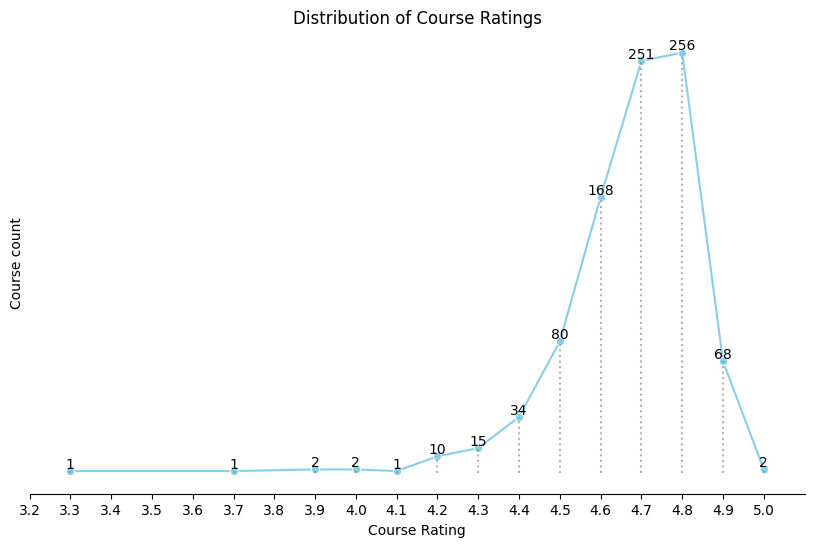

In [18]:
rating_counts = coursera_data['course_rating'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=rating_counts.index, y=rating_counts.values, marker='o', color='skyblue')

for x, y in zip(rating_counts.index, rating_counts.values):
    plt.vlines(x, ymin=0, ymax=y, colors='gray', linestyles='dotted', alpha=0.6)

sns.despine()
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.xlim(3.2, 5.1)
ticks = np.arange(3.2, 5.1, 0.1)
plt.xticks(ticks)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Course count')


for x, y in zip(rating_counts.index, rating_counts.values):
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=10)

plt.show()

Based on this graph, it is evident that more than 90% of ratings fall within the range of 4.5 to 5. This suggests that relying solely on course ratings may not be the most accurate method for assessing the quality of a course.

#### <center> What is the distribution of course ratings for each certificate type? <center>

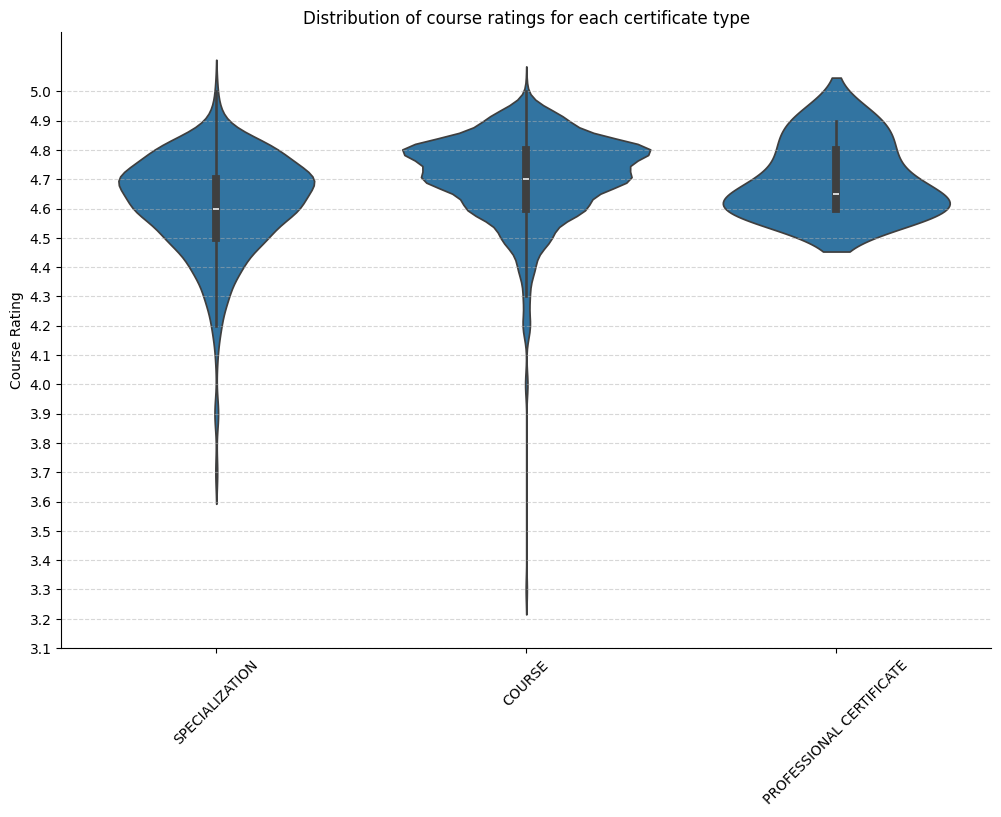

In [19]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='course_Certificate_type', y='course_rating', data=coursera_data)

plt.title('Distribution of course ratings for each certificate type')
plt.xlabel('')
plt.ylabel('Course Rating')
sns.despine()
plt.grid(which='major', axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
ticks = np.arange(3.1, 5.1, 0.1)
plt.yticks(ticks)

plt.show()

From the graph, we observe that learners tend to be more critical when rating regular courses and specializations, occasionally assigning lower ratings. Conversely, professional certificate courses receive consistently high ratings. This could be attributed to the higher standards and perceived quality associated with professional certificate programs. However, the predominance of ratings above 4 indicates that drawing definitive conclusions may be challenging.

#### <center> What is the distribution of certificate type by student count? <center>

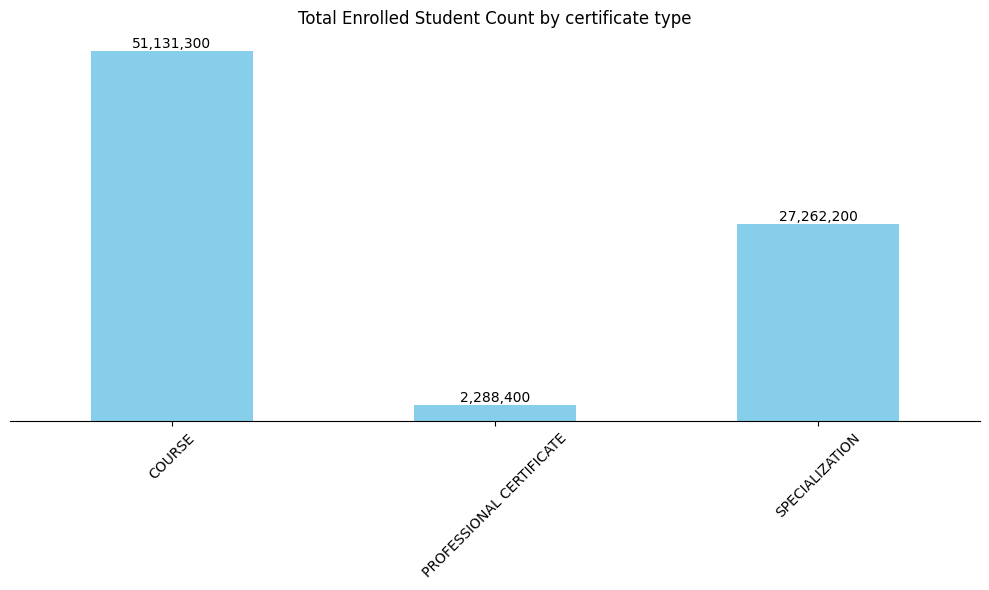

In [20]:
difficulty_counts = coursera_data.groupby('course_Certificate_type')['course_students_enrolled'].sum()

plt.figure(figsize=(10, 6))
bars = difficulty_counts.plot(kind='bar', color='skyblue')

sns.despine()
bars.spines['left'].set_visible(False)
bars.tick_params(axis='y', which='both', left=False, labelleft=False)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.title('Total Enrolled Student Count by certificate type')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### <center>What is course difficulty distribution by student count?<center>

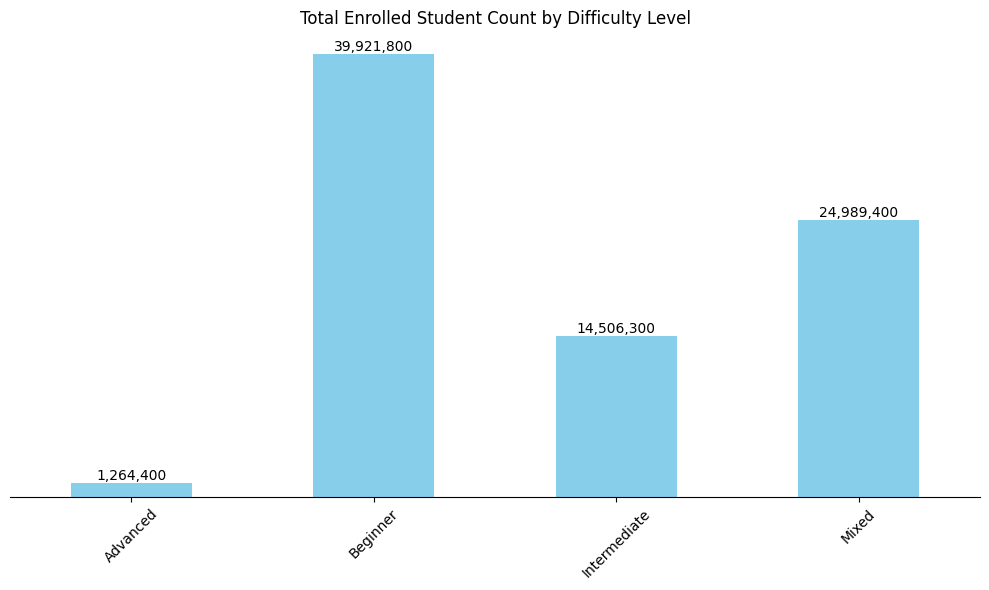

In [21]:
difficulty_counts = coursera_data.groupby('course_difficulty')['course_students_enrolled'].sum()

plt.figure(figsize=(10, 6))
bars = difficulty_counts.plot(kind='bar', color='skyblue')

sns.despine()
bars.spines['left'].set_visible(False)
bars.tick_params(axis='y', which='both', left=False, labelleft=False)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.title('Total Enrolled Student Count by Difficulty Level')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### <center>What is the distribution of difficulty levels for each certificate type? <center>

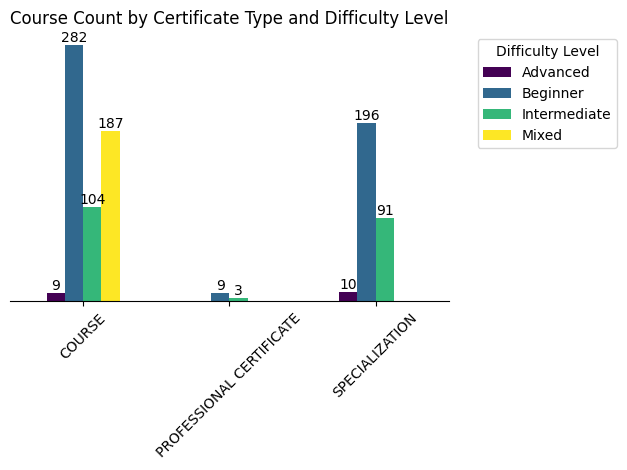

In [22]:
course_type_difficulty = coursera_data.groupby(['course_Certificate_type', 'course_difficulty'])['course_title'].count().unstack()

bars = course_type_difficulty.plot(kind='bar', stacked=False, cmap='viridis')

sns.despine(left=True)

bars.tick_params(axis='y', which='both', left=False, labelleft=False)

for bar in bars.patches:
    if bar.get_height() > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height()):,}', ha='center', va='bottom')

plt.title('Course Count by Certificate Type and Difficulty Level')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Difficulty Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The graph provides intriguing insights. It appears that all professional certificate courses are either beginner or intermediate level, with none classified as advanced. This finding seems counterintuitive, as professional certificates typically entail higher difficulty levels. Additionally, there is a notable scarcity of courses classified as advanced overall.

#### <center>Is there a correlation between course rating and enrolled student count?<center>

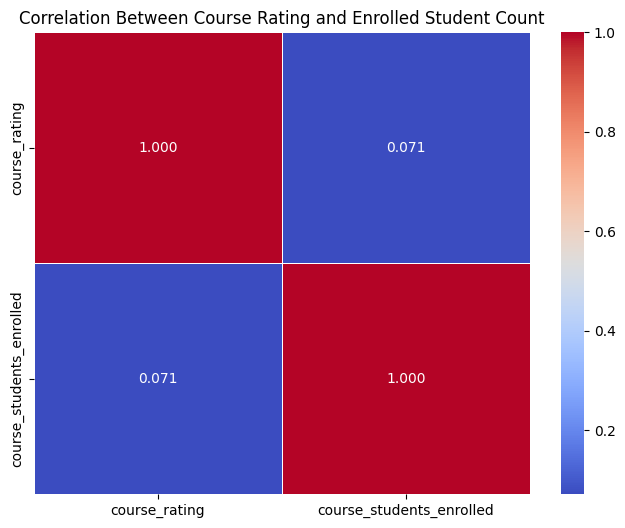

In [23]:

correlation_matrix = coursera_data[['course_rating', 'course_students_enrolled']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Between Course Rating and Enrolled Student Count')
plt.show()

The heatmap indicates a very weak correlation between student count and course rating, suggesting that these variables do not significantly influence each other.

### <center> Course related analysis overview <center>

From this analysis, several key insights have emerged. Firstly, it's evident that the majority of enrolled students opt for beginner-level courses, with a significant emphasis on programming-related topics. Despite the vast number of students, this influx contributes to greater variability in ratings. Additionally, there appears to be no substantial correlation between enrolled student count and course ratings. This suggests that enrollment decisions may not heavily factor in course ratings, and overall, courses tend to receive overwhelmingly positive ratings. Notably, there are no courses rated below 3, with over 90% falling within the 4 to 5 range. Consequently, it's clear that course rating alone may not reliably indicate course quality, leading to the conclusion that it may not be an effective metric for assessment.

### <center>Provider related analysis<center> 

#### <center>Which providers have most courses to offer?<center>

In [24]:
provider_course_counts = coursera_data['course_organization'].value_counts().head(20)
provider_course_counts

course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
University of Virginia                        19
Yale University                               17
Stanford University                           16
deeplearning.ai                               16
Universidad Nacional Autónoma de México       14
Berklee College of Music                      14
Rice University                               13
University of Colorado System                 13
University of Toronto                         11
University of Minnesota                       11


#### <center>which provider has best avarage rating?<center>

In [25]:
provider_course_counts = coursera_data_translated['course_organization'].value_counts()
providers_with_multiple_courses = provider_course_counts[provider_course_counts > 1].index
provider_avg_rating = coursera_data_translated[coursera_data_translated['course_organization'].isin(providers_with_multiple_courses)].groupby('course_organization')['course_rating'].mean()
best_provider = provider_avg_rating.idxmax()
best_provider

'University of Sao Paulo'

In [26]:
best_provider_courses = coursera_data_translated[coursera_data_translated['course_organization'] == best_provider]
best_provider_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
529,Introduction to Project Management Principles ...,University of Sao Paulo,SPECIALIZATION,4.9,Beginner,4500
530,Introduction to Computer Science with Python P...,University of Sao Paulo,COURSE,4.9,Beginner,120000
582,Marketing Digital,University of Sao Paulo,COURSE,4.8,Beginner,81000


#### <center>Which provider, that has more than 1 course uploaded, has worst avarage rating?<center>

In [27]:
worst_provider = provider_avg_rating.idxmin()
worst_provider

'The State University of New York'

In [28]:
worst_provider_courses = coursera_data_translated[coursera_data_translated['course_organization'] == worst_provider]
worst_provider_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000
452,International Cyber Conflicts,The State University of New York,COURSE,4.4,Mixed,25000
662,Practical Time Series Analysis,The State University of New York,COURSE,4.6,Intermediate,39000
741,Solar Energy Basics,The State University of New York,COURSE,4.8,Beginner,17000


#### <center>Is there correlation between providers course count and course rating?<center>

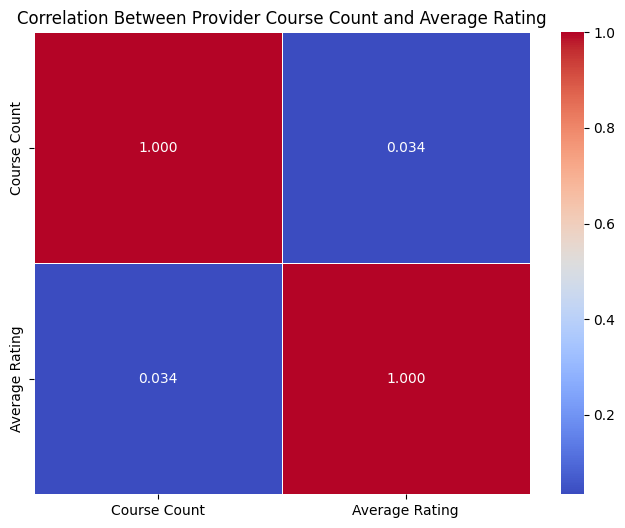

In [29]:
provider_data = pd.DataFrame({'Course Count': provider_course_counts, 'Average Rating': provider_avg_rating})

provider_data = provider_data[provider_data['Course Count'] > 1]
correlation_matrix = provider_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Between Provider Course Count and Average Rating')
plt.xlabel('')
plt.ylabel('')
plt.show()

The correlation between the number of courses provided by an organization and the average rating is approximately 0.034, indicating a very low correlation. Therefore, it can be concluded that there is likely no significant correlation between these two variables.

#### <center>What is the distribution of course count and their avarage ratings?<center>

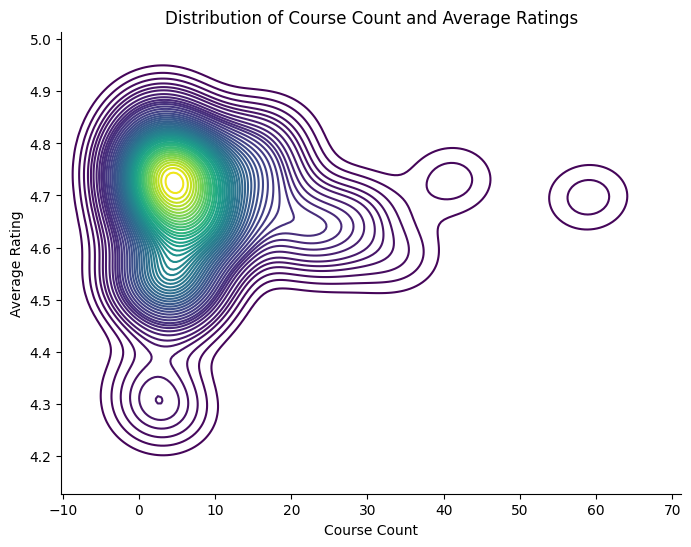

In [30]:
provider_data = pd.DataFrame({'Course Count': provider_course_counts, 'Average Rating': provider_avg_rating})

provider_data = provider_data[provider_data['Course Count'] > 1]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=provider_data, x='Course Count', y='Average Rating', fill=False, cmap='viridis', thresh=0, levels=50)
sns.despine()
plt.title('Distribution of Course Count and Average Ratings')
plt.xlabel('Course Count')
plt.ylabel('Average Rating')
plt.show()

In this kernel density plot, it is evident that the majority of course providers offer fewer than 20 courses, with their course ratings predominantly concentrated in the range of 4.5 to 4.9. This observation aligns with the findings from the course exploratory data analysis (EDA) section. Additionally, the plot indicates that providers with a higher number of courses do not necessarily achieve better ratings.

#### <center>Which providers have most students?<center>

In [31]:
provider_students = coursera_data.groupby('course_organization')['course_students_enrolled'].sum()
provider_students_sorted = provider_students.sort_values(ascending=False)
provider_students_sorted.head(20)

course_organization
University of Michigan                        7437700
University of Pennsylvania                    5501300
Stanford University                           4854000
University of California, Irvine              4326000
Johns Hopkins University                      4298900
Duke University                               3967600
Yale University                               3952000
IBM                                           2956400
deeplearning.ai                               2863400
Google Cloud                                  2604300
Georgia Institute of Technology               1813000
University of Illinois at Urbana-Champaign    1679000
University of Virginia                        1556000
Berklee College of Music                      1288000
University of California, Davis               1278700
Universidad Nacional Autónoma de México       1207900
University of California San Diego            1166000
Google                                        1153000
The Univ

#### <center>Which provider has most avarage students per course?<center>

In [41]:
provider_avg_students_per_course = coursera_data_translated.groupby('course_organization')['course_students_enrolled'].mean()
provider_avg_students_per_course.sort_values(ascending=False).head(20)

course_organization
Stanford University                              303375.000000
Yale University                                  232470.588235
McMaster University                              230000.000000
Google - Spectrum Sharing                        210000.000000
Ludwig Maximilians University in Munich (LMU)    192500.000000
Polytechnic university                           190000.000000
University of Michigan                           181407.317073
Georgia Institute of Technology                  181300.000000
deeplearning.ai                                  178962.500000
University of Washington                         167400.000000
University of California, Irvine                 160222.222222
Johns Hopkins University                         153532.142857
Vanderbilt University                            144000.000000
Duke University                                  141700.000000
Yonsei University                                140750.000000
IBM                                

### <center> Provider related analysis overview <center>

From the graphs generated during the provider-related exploratory data analysis (EDA), it is reasonable to conclude that there is no evident connection between the number of courses provided by a provider and their average rating. Moreover, it is apparent that most providers prioritize quality over quantity, as they tend to offer a lower count of courses with higher average ratings. However, it's worth noting that earlier analyses revealed that course rating is not a reliable feature for measuring the quality of a course.

## <center>Conclusion<center>

In conclusion, the analysis of the Coursera course dataset provided valuable insights into various aspects of the dataset. Through the exploration of distributions and the use of a variety of graphs, we gained a deeper understanding of the dataset. Despite our efforts to identify correlations, we did not find any significant ones. Additionally, we addressed questions regarding course popularity and the use of metrics to determine quality. Ultimately, our analysis suggests that people tend to give positive reviews, which diminishes the value of the rating metric ("When everyone is special, no one is"). Furthermore, while it appears that most providers prioritize better ratings over a high quantity of courses, the low value of the rating metric prevents us from drawing conclusive evidence.

## <center>Suggestions for future works<center>


During this analysis, we focused on addressing fundamental questions regarding the dataset. However, there are opportunities for more in-depth exploration given the dataset's limitations and fixed timeframe:<br>

1. Extensive analysis of each provider individually: By delving deeper into the data for each provider, we could uncover trends specific to their offerings, such as course diversity, quality consistency, and popularity among learners.<br>

2. Splitting courses by scientific field: Segmenting courses by their scientific field would enable us to conduct similar analyses within each category, revealing unique insights into learner preferences, course ratings, and enrollment patterns across different disciplines.<br>

3. Dataset expansion with timestamps: Incorporating timestamps for each course creation would enrich the dataset, allowing us to track changes and improvements over time for individual providers. This temporal analysis could unveil trends in course offerings, updates, and learner engagement patterns, providing valuable insights into the evolution of online education platforms.<br>

By pursuing these avenues of analysis, we can gain a more comprehensive understanding of the Coursera course dataset and extract deeper insights to inform decision-making and future research endeavors.
